# FFT and Polynomial Multiplication

Here, you will implement FFT, and then implement polynomial multiplication, using FFT as a black box. We believe this will give you a thorough understanding of the complete working of FFT. Have fun!

Fun fact: Many companies and large organizations have dedicated teams working towards optimizing FFT and applying them to various problems. 

There also exist several public repositories dedicated to making the fastest implementations of FFT. One such repository is FFTW (https://www.fftw.org) which stands for The Fastest Fourier Transform in the West! 

In [1]:
ok="""
         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            
"""

In [2]:
import math
import cmath
import numpy as np
from numpy.random import randint
from time import time
import matplotlib.pyplot as plt
import tqdm

import typing

In [3]:
np.random.seed(114514)

In [4]:
def reversed_np_fft(*args, **kwargs):
    return np.roll(np.fft.fft(*args, **kwargs)[::-1], 1)

## Complex Numbers in Python

Python has an inbuilt functionality to deal with complex literals. Following are some ways to represent complex numbers in python:

In [5]:
z1 = 2 + 3j
print('Real part:', z1.real)
print('Imaginary part:', z1.imag)
print('z1:', z1)
print('Conjugate: ', z1.conjugate())

Real part: 2.0
Imaginary part: 3.0
z1: (2+3j)
Conjugate:  (2-3j)


You could also write:

In [6]:
z2 = complex(2, 3)
print('Real part:', z2.real)
print('Imaginary part:', z2.imag)
print('z2:', z2)
print('Conjugate: ', z2.conjugate())

Real part: 2.0
Imaginary part: 3.0
z2: (2+3j)
Conjugate:  (2-3j)


`numpy` also supports calculation with complex numbers.

In [7]:
npz = np.e ** (3j + 3)
print('Real part:', npz.real)
print('Imaginary part:', npz.imag)
print('npz:', npz)

Real part: -19.884530844146983
Imaginary part: 2.8344711324870038
npz: (-19.884530844146983+2.8344711324870038j)


However, sometimes `numpy`'s default `dtype` is `float`, so if you need to use those functions, `dtype` specification might be needed.

In [8]:
try:
    err = np.zeros(16)
    err[3] = 3 + 5j
except Exception as e:
    print(e)

can't convert complex to float


In [9]:
try:
    noerr = np.zeros(16, dtype=complex)
    noerr[3] = 3 + 5j
except Exception as e:
    print(e)
print(noerr[3])

(3+5j)


## Roots of Unity
$n$th roots of unity are defined as complex numbers $z$, where $z^n=1$.

Another definition is $z = e^{\frac{2\pi ik}{n}}$ where $k={0, 1, \cdots, n}$.     

First, using any definition, write a function that, given $n$, outputs a list of all $n$th roots of unity. 

The order of your roots will matter later in the notebook, so make sure your roots are in the order of $e^{\frac{2\pi ik}{n}}$ for $k={0, 1, \cdots, n}$, i.e. the first element corresponds to $k=0$, the second to $k=1$, and so on.

In [10]:
def roots_of_unities(n: int) -> typing.Union[list, np.ndarray]:
    roots = []
    
    ## Your solution here
    for k in range(0, n+1):
        z = np.e ** (2j * np.pi * k / n)
        roots.append(z)
    
    return roots

To make sure your helper function is correct, we can draw the resulting values on the unit circle. Run the following cell and make sure the output is as you expect it to be:

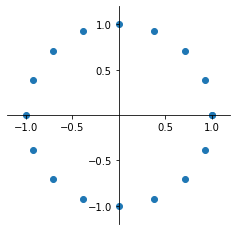

In [11]:
N = 16 # feel free to change this value and observe what happens
roots = roots_of_unities(N)

# Plot
f,ax = plt.subplots()
f.set_figwidth(4)
f.set_figheight(4)
plt.scatter([r.real for r in roots], [r.imag for r in roots]) 
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
ax.set_xticks([-1, -0.5, 0.5, 1])
ax.set_yticks([-1, -0.5, 0.5, 1])
ax.xaxis.tick_bottom()
plt.show() 

## Discrete Fourier Transform
In CS170, we define the process that transforms polynomials from coefficient representation to value representation (at next $2^n$th roots of unities) as "Discrete Fourier Transform".  

For example, for polynomial $P(x)=1+x+x^2+x^3$, its value representation would be $P(1)=4, P(i)=0, P(-1)=0, P(-i)=0$. Note that we write $P(x)$ and its corresponding coefficient vector in increasing order of exponents (i.e. smallest exponent comes first).

Write an naive algorithm that simulates DFT and returns a list of values (each corresponding to the polynomial evaluated at a root of unity). Again, the order of your values matter.

The input list is a list of coefficients but you might find `np.poly1d` useful (if you choose to use `np.poly1d` keep in mind the order of the coefficients may be different).

In [12]:
hyperceil = lambda x: int(2 ** np.ceil(np.log2(x))) # Utility function, returns next 2^n of x

In [13]:
def dft_naive(coeffs: typing.Union[list, np.ndarray]) -> typing.Union[list, np.ndarray]:
    roots_needed = hyperceil(len(coeffs))
    roots = roots_of_unities(roots_needed)
    
    # Your solution here:
    p = np.poly1d(list(reversed(coeffs)))
    eval = []

    for w in roots[:-1]:
        eval.append(p(w))

    return eval

In [14]:
for _ in tqdm.tqdm(range(100)):
    vec = np.random.randint(0, 512, size=2 ** np.random.randint(1, 3))
    assert (np.isclose(dft_naive(vec), reversed_np_fft(vec))).all()
print(ok)

100%|██████████| 100/100 [00:00<00:00, 9086.45it/s]


         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            



### DFT Matrix
You might've already done this in EE16B, but there is a matrix multiplication way to represent DFT: now, populate the DFT matrix.

With some EE16A/Math 54 knowledge, DFT could be represented as this matrix-vector multiplication, as outlined in Discussion 2 Q2:
$$ 
\begin{bmatrix}
P(1) \\
P(\omega_n) \\ 
P(\omega_n^2) \\
\vdots \\
P(\omega_n^{n-1})
\end{bmatrix}
= 
\begin{bmatrix}
1 & 1 & 1 & \ldots & 1 \\
1 & \omega_n^1 & \omega_n^2 & \ldots & \omega_n^{(n-1)} \\
1 & \omega_n^2 & \omega_n^4 & \ldots & \omega_n^{2(n-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega_n^{(n-1)} & \omega_n^{2(n-1)} & \ldots & \omega_n^{(n-1)(n-1)}
\end{bmatrix} \cdot
\begin{bmatrix}
p_0 \\
p_1 \\
p_2 \\
\vdots \\
p_{n-1}
\end{bmatrix}
$$
where $\omega_n$ is the *primitive* n-th root of unity, namely $\omega_n=e^\frac{2\pi i}{n}$, and the matrix in the middle would be the DFT matrix.

Alternatively, if you define $\vec{\omega_n} := \begin{bmatrix} \omega_n^0 & \omega_n^1 & \ldots & \omega_n^{n-2} &\omega_n^{n-1} \end{bmatrix}$, and for this question **only** denote $\vec{v}^n$ as **element-wise** exponentional of $\vec{v}$, we can define the matrix as (which is useful with numpy):
$$
\begin{bmatrix}
    \vec{\omega_n}^0 \\
    \vec{\omega_n}^1 \\
    \vdots \\
    \vec{\omega_n}^{n-1}
\end{bmatrix}   
$$

In [61]:
def get_dft_matrix(n: int) -> typing.Union[list, np.ndarray]:
    
    # Your solution here
    roots = roots_of_unities(n)[:-1]
    w_vector = np.array(roots).reshape((1, len(roots)))
    return np.repeat(w_vector, n, axis=0) ** np.arange(n).reshape((n, 1))

In [62]:
for _ in tqdm.tqdm(range(100)):
    n = np.random.randint(16, 256)
    assert np.allclose(get_dft_matrix(n), np.power(np.fft.fft(np.eye(n)), -1))
print(ok)

100%|██████████| 100/100 [00:00<00:00, 270.26it/s]


         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            



You can try (but you don't have to) and observe that the matrix multiplication yields the same result as your naive DFT.

## FFT

FFT is an algorithm that calculates DFT in $\mathcal{O}(n \log n)$ time.

Now, you'll implement FFT by itself.  The way it is defined here, this takes in the coefficients of a polynomial as input, evaluates it on the $n$-th roots of unity, and returns the list of these values.  For instance, calling 

$$
FFT([1, 2, 3], \; [1, i, -1, -i])
$$

should evaluate the polynomial $1 + 2x + 3x^2$ on the points $1, i, -1, -i$, returning

$$
[6, \; -2 + 2i, \; 2, \; -2 - 2i]
$$

Recall that to do this efficiently for a polynomial 

$$
P(x) = a_0 + a_1x + a_2x^2 + \cdots + a_{n - 1} x^{n - 1}
$$

we define two other polynomials $E$ and $O$, containing the coefficients of the even and odd degree terms respectively,

$$
E(x) := a_0 + a_2x + \cdots + a_{n - 2}x^{n/2 - 1}, \qquad O(x) := a_1 + a_3x + \cdots = a_{n - 1}x^{n/2 - 1}
$$

which satisfy the relation

$$
P(x) = E(x^2) + xO(x^2)
$$

We recursively run FFT on $E$ and $O$, evaluating them on the $n/2$-th roots of unity, then use these values to evaluate $P$ on the $n$-th roots of unity, via the above relation.

Implement this procedure below, where $\text{``coeffs"}$ are the coefficients of the polynomial we want to evaluate (with the coefficient of $x^i$ at index $i$), and where  

$$
\text{roots} = [1, \omega, \omega^2, \ldots, \omega^{n - 1}]
$$

for some primitive $n$-th root of unity $\omega$ where $n$ is a power of $2$.  (Note:  Arithmetic operations on complex numbers in python work just like they do for floats or ints.  Also, you can use $\text{A[::k]}$ to take every $k$-th element of an array A)

In [52]:
def fft(coeffs, roots):
    n = len(coeffs)
    assert n == hyperceil(n)
    
    ### Your solution here
    p = np.poly1d(list(reversed(coeffs)))
    eval = []

    if roots[n-1] == 1:
        eval.append(p(1))
        return eval

    mid = int(n / 2)
    coeffs_e, coeffs_o = coeffs[0::2], coeffs[1::2]
    roots_e, roots_o = roots[0::2], roots[0::2]
    # print(n, coeffs_e, coeffs_o)
    eval_e = fft(coeffs_e, roots_e)
    eval_o = fft(coeffs_o, roots_o)

    for j in range(n):
        half_j = j % mid
        eval.append(eval_e[half_j] + roots[j] * eval_o[half_j])
    
    return eval

### Testing

Here's a sanity check to test your implementation.  Calling $FFT([1, 2, 3], [1, 1j, -1, -1j])$ should output $[6, \; -2 + 2j, \; 2, \; -2 - 2j]$ (Python uses $j$ for the imaginary unit instead of $i$.)

In [53]:
expected = [6, -2+2j, 2, -2-2j]
actual = fft([1, 2, 3, 0], [1, 1j, -1, -1j])
print("expected: {}".format(expected))
print("actual:   {}".format(actual))

expected: [6, (-2+2j), 2, (-2-2j)]
actual:   [6, (-2+2j), 2, (-2-2j)]


If you are correctly implemented the FFT algorithm and not just naively evaluating on each point, it should rely on the points being roots of unity.  Therefore, the call $FFT([1, 2, 3], [1, 2, 3, 4])$ should NOT return the values of $1 + 2x + 3x^2$ on the inputs $[1, 2, 3, 4]$ (which would be $[6, 17, 34, 57]$):

In [56]:
not_expected = [6, 17, 34, 57]
actual = fft([1, 2, 3, 0], [1, 2, 3, 4])
print("NOT expected: {}".format(not_expected))
print("actual:       {}".format(actual))

NOT expected: [6, 17, 34, 57]
actual:       [6, 14, 10, 18]


In [55]:
for _ in tqdm.tqdm(range(100)):
    vec = np.random.randint(0, 512, size=2 ** np.random.randint(4, 16))
    assert (np.isclose(fft(vec, roots_of_unities(len(vec))), reversed_np_fft(vec))).all()
print(ok)

100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            



Verify that your FFT yields the same result as your naive DFT implementation (optional).

In [66]:
# Your solution here (optional)
for _ in tqdm.tqdm(range(10)):
    vec = np.random.randint(0, 512, size=2 ** np.random.randint(4, 16))
    assert (np.isclose(fft(vec, roots_of_unities(len(vec))), dft_naive(vec))).all()
print(ok)

100%|██████████| 10/10 [04:33<00:00, 27.31s/it]


         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            



## Inverse FFT
Now that you know your FFT is correct, implement IFFT.  
IFFT should be less than 3 lines. You can check the bottom of DPV page 75 to see how it is finished.

In [77]:
def ifft(vals, roots):
    n = len(vals)
    assert n == hyperceil(n)
    
    ### Your solution here
    i_roots = [root ** -1 for root in roots]
    coeffs = [coeff / n for coeff in fft(vals, i_roots)]
    return  coeffs

In [78]:
for _ in tqdm.tqdm(range(100)):
    vec = np.random.randint(0, 512, size=2 ** np.random.randint(4, 16))
    roots = roots_of_unities(len(vec))
    assert (np.isclose(ifft(fft(vec, roots), roots), vec)).all()
print(ok)

100%|██████████| 100/100 [00:30<00:00,  3.24it/s]


         _          _                  _           _        
        /\ \       / /\               / /\        / /\      
       /  \ \     / /  \             / /  \      / /  \     
      / /\ \ \   / / /\ \           / / /\ \__  / / /\ \__  
     / / /\ \_\ / / /\ \ \         / / /\ \___\/ / /\ \___\ 
    / / /_/ / // / /  \ \ \        \ \ \ \/___/\ \ \ \/___/ 
   / / /__\/ // / /___/ /\ \        \ \ \       \ \ \       
  / / /_____// / /_____/ /\ \   _    \ \ \  _    \ \ \      
 / / /      / /_________/\ \ \ /_/\__/ / / /_/\__/ / /      
/ / /      / / /_       __\ \_\ \/___/ /  \ \/___/ /       
\/_/       \_\___\     /____/_/ \_____\/    \_____\/        
                                                            



## Polynomial Multiplication

Now you'll implement polynomial multiplication, using your FFT function as a black box.  Recall that to do this, we first run FFT on the coefficients of each polynomial to evaluate them on the $n$-th roots of unity for a sufficiently large power of 2,  which we call $n$.  We then multiply these values together pointwise, and finally run the inverse FFT on these values to convert back to coefficient form, obtaining the coefficient of the product.  To perform inverse FFT, we can simply run FFT, but with the roots of unity inverted, and divide by $n$ at the end.

We will need another helper function here. First, note that FFT and IFFT only accepts polynomials of degree $2^n-1$, so you would need to pad coefficients to the next `hyperceil(n)`.

In [96]:
def pad(coeffs: typing.Union[list, np.ndarray], to: int) -> np.ndarray:
    """
    pad([2, 3, 4], 4)
    [2, 3, 4, 0]
    pad([1, 1, 4, 5, 1, 4], 8)
    [1, 1, 4, 5, 1, 4, 0, 0]
    """
    assert len(coeffs) <= to
    
    ## Your solution here
    for i in range(to):
        if i >= len(coeffs):
            coeffs.append(0)
    
    return coeffs

Now, we are ready to implement the polynomial multiplication. Do so below. (Hint: Python supports computing the inverse of a complex number by raising it to the power of $-1$. In other words, suppose $\texttt{x}$ is a complex number, the inverse is $\texttt{x**(-1)}$.)

In [111]:
def poly_multiply(coeffs1, coeffs2):
    
    ## Your solution here
    n = hyperceil(len(coeffs1)+len(coeffs2)-1)
    roots = roots_of_unities(n)
    coeffs1_pad = pad(coeffs1, n)
    coeffs2_pad = pad(coeffs2, n)
    vals1 = fft(coeffs1_pad, roots)
    vals2 = fft(coeffs2_pad, roots)

    vals_mul = [val1 * val2 for val1, val2 in zip(vals1, vals2)]
    coeffs_mul = ifft(vals_mul, roots)
    
    return coeffs_mul

### Testing

In [80]:
def round_complex_to_int(lst):
    return [round(x.real) for x in lst]

def zero_pop(lst) -> np.ndarray:
    return np.trim_zeros(lst, "b")

Here are a couple sanity checks for your solution.

In [112]:
expected = [4, 13, 22, 15]
actual = round_complex_to_int(poly_multiply([1, 2, 3], [4, 5]))
print("expected: {}".format(expected))
print("actual:   {}".format(actual))

expected: [4, 13, 22, 15]
actual:   [4, 13, 22, 15]


In [113]:
expected = [4, 13, 28, 27, 18, 0, 0, 0]
actual = round_complex_to_int(poly_multiply([1, 2, 3], [4, 5, 6]))
print("expected: {}".format(expected))
print("actual:   {}".format(actual))

expected: [4, 13, 28, 27, 18, 0, 0, 0]
actual:   [4, 13, 28, 27, 18, 0, 0, 0]


One quirk of FFT is that we use complex numbers to multiply integer polynomials, so this leads to floating point errors.  You can see this with the following call, which will probably not return exact integer values (unless you did something in your implementation to handle this):

In [114]:
result = poly_multiply([1, 2, 3], [4, 5, 6])
result

[(3.999999999999999+2.0825185391870887e-15j),
 (12.999999999999998+8.807564949441748e-16j),
 (28-4.2924536033816196e-16j),
 (27-9.265260047530536e-16j),
 (18-6.12942380210265e-16j),
 (1.7763568394002505e-15-1.3396895543061384e-15j),
 (1.7763568394002505e-15-3.055427191502495e-16j),
 -2.7028828441533043e-15j]

Therefore, if we're only interested in integers, like many of the homework problems, we have to round the result:

In [115]:
result = round_complex_to_int(result)
result

[4, 13, 28, 27, 18, 0, 0, 0]

However, there might still be trailing zeros we have to remove:

In [116]:
zero_pop(result)

[4, 13, 28, 27, 18]

This (hopefully) gives us exactly what we would have gotten by multiplying the polynomials normally, $[4, 13, 28, 27, 18]$.

### Runtime Comparison

Here, we compare the runtime of polynomial multiplication with FFT to the naive algorithm.

In [89]:
def poly_multiply_naive(coeffs1, coeffs2):
    n1, n2 = len(coeffs1), len(coeffs2)
    n = n1 + n2 - 1
    prod_coeffs = [0] * n
    for deg in range(n):
        for i in range(max(0, deg + 1 - n2), min(n1, deg + 1)):
            prod_coeffs[deg] += coeffs1[i] * coeffs2[deg - i]
    return prod_coeffs

In [90]:
poly_multiply_naive([3,4,5], [7,2,7,4])

[21, 34, 64, 50, 51, 20]

Running the following cell, you should see FFT perform similarly to or worse than the naive algorithm on small inputs, but perform significantly better once inputs are sufficiently large, which should be apparent by how long you have to wait for the naive algorithm to finish on the largest input (you might need to run the next cell twice to see the plot for some reason):


size: 1
FFT time:   0.001001
naive time: 0.000000
speed up: 0.000000

size: 10
FFT time:   0.003505
naive time: 0.000000
speed up: 0.000000

size: 100
FFT time:   0.026433
naive time: 0.005721
speed up: 0.216423

size: 1000
FFT time:   0.214123
naive time: 0.450571
speed up: 2.104256

size: 10000
FFT time:   3.598093
naive time: 104.538897
speed up: 29.053975


Text(0.5, 1.0, 'FFT Polynomial Multiplication Speedup')

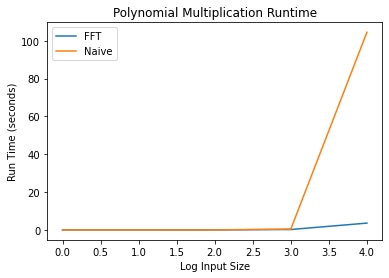

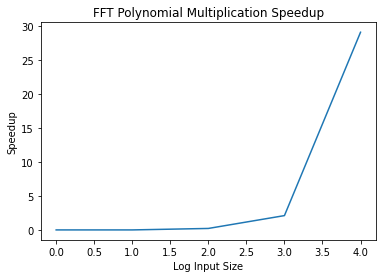

In [120]:
def rand_ints(lo, hi, length):
    ints = list(randint(lo, hi, length))
    ints = [int(x) for x in ints]
    return ints

def record(array, value, name):
    array.append(value)
    print("%s%f" % (name, value))

fft_times = []
naive_times = []
speed_ups = []

for i in range(5):
    n = 10 ** i
    print("\nsize: %d" % n)
    poly1 = rand_ints(1, 100, n)
    poly2 = rand_ints(1, 100, n)
    time1 = time()
    fft_res = poly_multiply(poly1, poly2)
    fft_res = zero_pop(round_complex_to_int(fft_res))
    time2 = time()
    fft_time = time2 - time1
    record(fft_times, fft_time, "FFT time:   ")
    naive_res = poly_multiply_naive(poly1, poly2)
    naive_res = zero_pop(naive_res)
    time3 = time()
    naive_time = time3 - time2
    record(naive_times, naive_time, "naive time: ")
    assert fft_res == naive_res
    speed_up = naive_time / (fft_time + 1e-8)
    record(speed_ups, speed_up, "speed up: ")

plt.plot(fft_times, label="FFT")
plt.plot(naive_times, label="Naive")
plt.xlabel("Log Input Size")
plt.ylabel("Run Time (seconds)")
plt.legend(loc="upper left")
plt.title("Polynomial Multiplication Runtime")

plt.figure()
plt.plot(speed_ups)
plt.xlabel("Log Input Size")
plt.ylabel("Speedup")
plt.title("FFT Polynomial Multiplication Speedup")

Contributors: Nate Young, Param Nagda, yxu